# Stereo vision self

In [39]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage import data

#plt.gray()

In [40]:
# load the images
nose_left = cv2.imread("nose_left.png")
nose_right = cv2.imread("nose_right.png")
nose_span = cv2.imread("nose_span.png")
nose1 = cv2.imread("nose1.png")
nose2 = cv2.imread("nose2.png")
nose3 = cv2.imread("nose3.png")
tsukuba_left = cv2.imread("tsukuba_left.png")
tsukuba_right = cv2.imread("tsukuba_right.png")


In [41]:
print(type(nose_left[0][0][0]))

<class 'numpy.uint8'>


In [42]:
#print(np.uint16(nose_left))

## Step 1: compare 2 images

In [56]:
def compare(img1, img2):
    # HAS TO BE AT LEAST SIGNED 16BIT INT WHEN WORKING IN IMAGE SPACE
    return np.sum(np.abs(img1-img2))

In [44]:
print(compare(nose_left, nose_right))

22971


In [45]:
print(compare(nose_right, nose_left))

22971


## Step 2: Several comparsions

In [46]:
def multi_comp(img, img_lst):
    differences = []
    for comp_img in img_lst:
        differences.append(compare(img, comp_img))
    return differences

In [47]:
print(multi_comp(nose_left, [nose1, nose2, nose3]))

[4083, 357, 4470]


## Step 3: Find best fit loc in a row

132


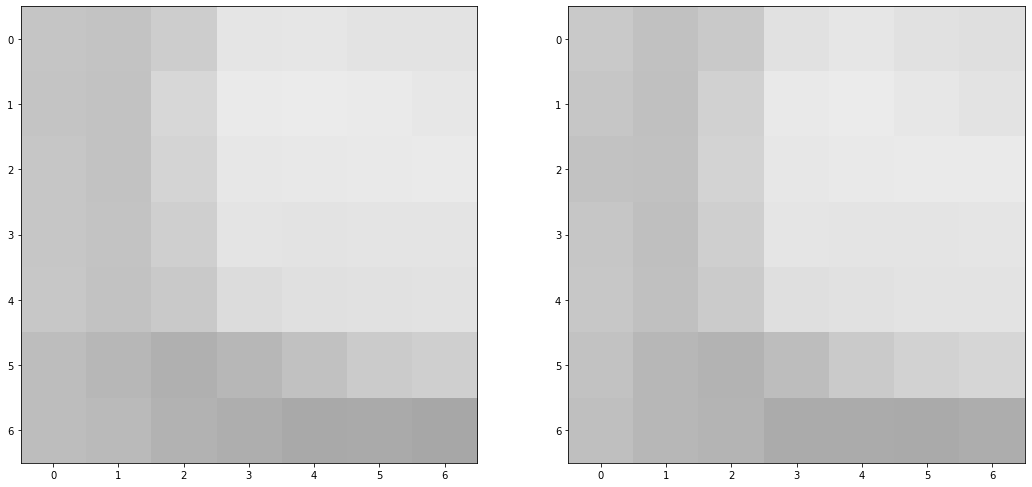

In [52]:
def best_in_row(img, row_img):
    # Expects that row_img height is the same as img
    x = img.shape[1]
    #print(x)
    row_x = row_img.shape[1]
    #print(row_x)
    sub_imgs = []
    for i in range(row_x-x):
        sub_imgs.append(row_img[:, i:(i+7)])
    diffs = multi_comp(img, sub_imgs)
    best = np.argmin(diffs)
    return best

best_index = best_in_row(nose_left, nose_span)
print(best_index)

f, (ax_1, ax_2) = plt.subplots(1, 2, figsize=(18,18))
ax_1.imshow(cv2.cvtColor(nose_left, cv2.COLOR_BGR2RGB))
ax_2.imshow(cv2.cvtColor(nose_span[:, best_index:best_index+7], cv2.COLOR_BGR2RGB))


## Step Challange: store disparity (best fit indices of second image when comparing each pixel from first minus compared pixel index from original image)

In [57]:
def comp_images(img1, img2, ksize=7):
    # HAS TO BE AT LEAST SIGNED 16BIT INT WHEN WORKING IN IMAGE SPACE
    img1 = np.int16(img1)
    img2 = np.int16(img2)
    kradius = (ksize-1)/2
    x, y = img1.shape[:2]
    disps = np.zeros((x-ksize, y-ksize), dtype=int)
    for i in range(disps.shape[0]):
        for j in range(disps.shape[1]):
            template = img1[i:i+ksize, j:j+ksize]
            row = img2[i:i+ksize, :]
            disps[i, j] = best_in_row(template, row) - j
    return disps

result = comp_images(tsukuba_left, tsukuba_right)
print(result)

[[  0   0  -1 ...  -4  -4  -2]
 [  0   0  -1 ...  -6  -6  -2]
 [  0   0  -1 ...  -6  -6  -2]
 ...
 [  0   3   3 ... -24 -24 -24]
 [  0   3   0 ... -24 -24 -24]
 [  0   3   0 ... -23 -23 -23]]


In [67]:
with np.printoptions(edgeitems=7):
    print(result)

[[  0   0  -1  -2  -3  -4  -5 ...  -4  -4  -4  -4  -4  -4  -2]
 [  0   0  -1  -2  -3  -4  -5 ...  -4  -4  -4  -4  -6  -6  -2]
 [  0   0  -1  -2  -3  -4  -5 ...  -4  -4  -4  -6  -6  -6  -2]
 [  0   0 294 285 298 298 298 ...  -4  -4  -4  -4  -6  -6  -2]
 [  0   0 294 285 294 293 296 ...  -2  -4  -4  -4  -6  -6  -2]
 [  0   0 296 285 298 297 298 ...  -4  -8  -4  -6  -6  -6  -2]
 [  0   0 296 295 290 293 290 ...  -8  -8  -6  -6  -6  -6  -2]
 ...
 [  5   5 199   3   2   1   0 ... -18 -34 -32 -36 -38 -38 -38]
 [  5   4 199   2   1   0   0 ... -18 -28 -22 -36 -22 -22 -40]
 [  0   4 199   2   1   0  -1 ... -28 -34 -36 -36 -38 -38 -40]
 [  0   4 199   2   1   0  -2 ... -24 -28 -22 -36 -38 -38 -40]
 [  0   3   3   2   1   0  -1 ... -22 -22 -22 -36 -24 -24 -24]
 [  0   3   0   1   0  -1  -2 ... -22 -22 -28 -36 -24 -24 -24]
 [  0   3   0   1   0  -3  -2 ... -22 -28 -36 -32 -23 -23 -23]]


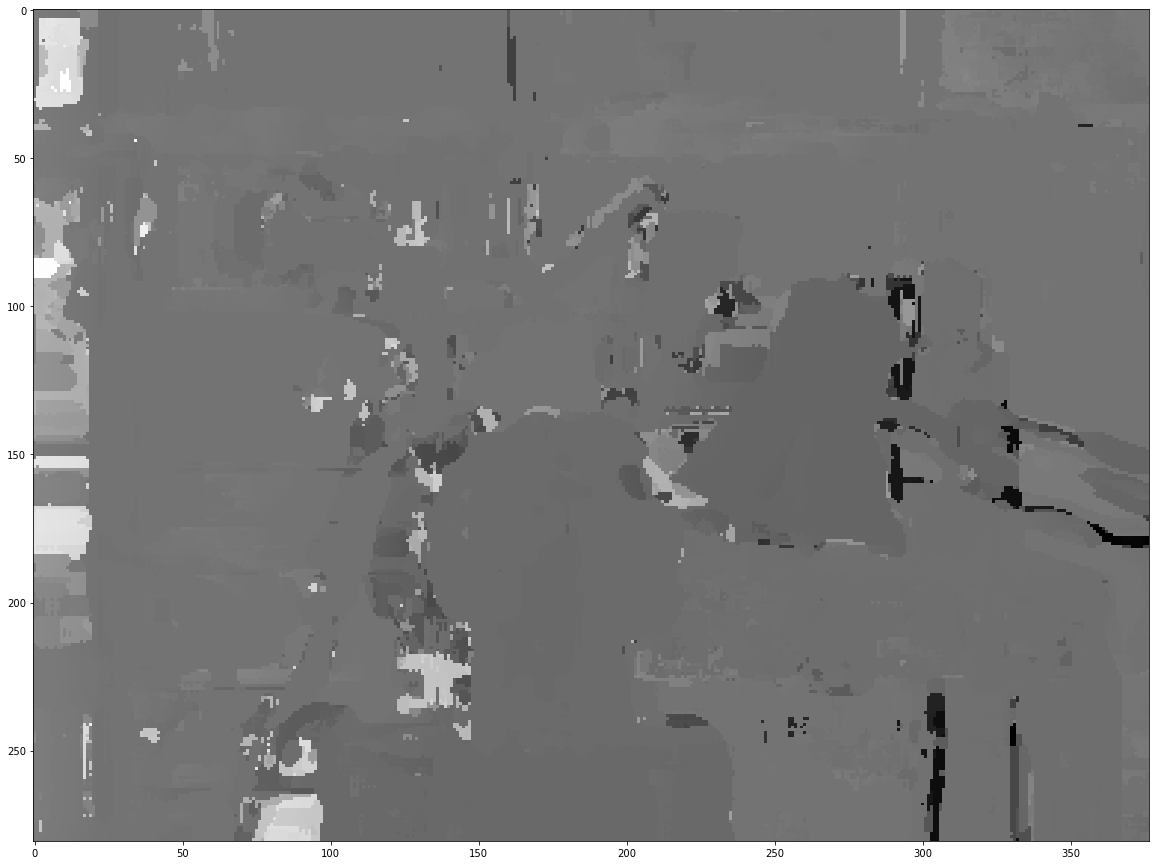

In [70]:
fig, ax = plt.subplots(figsize=(20,20))
ax.imshow(result, cmap="gray")